In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ghibtools as gh
import seaborn as sns
import glob
from pyedflib import highlevel
import datetime
from params import patients

In [3]:
participants = patients

In [4]:
def get_sleep_features(participants=participants):
    concat = []
    for participant in participants:
        df = pd.read_excel(f'../participant_characteristics/sleep_parameters_{participant}.xlsx', index_col = 0)
        concat.append(df)
    df_all = pd.concat(concat)
    return df_all

In [5]:
sleep_params = get_sleep_features()

In [6]:
sleep_params

,participant,method,time in bed,sleep onset latency,total sleep period,wake after sleep onset,total sleep time,sleep efficiency,rem latency,N2 raw time,N2 norm time,N3 raw time,N3 norm time,rem raw time,rem norm time,arousal index
0,P1,human,529.666667,49.0,480.666667,51.0,392.5,0.741032,77.0,208.0,0.529936,72.5,0.184713,99.0,0.252229,16.509554
1,P1,ia,529.666667,62.0,467.666667,166.5,264.5,0.499371,64.0,141.5,0.534972,34.0,0.128544,87.5,0.330813,24.499055
0,P2,human,566.666667,43.5,523.166667,40.5,482.5,0.851471,153.0,228.5,0.473575,100.5,0.208290,123.5,0.255959,18.404145
1,P2,ia,566.666667,36.0,530.666667,115.0,415.5,0.733235,160.5,259.5,0.624549,50.0,0.120337,101.5,0.244284,21.371841
0,P3,human,598.850000,16.5,582.350000,34.5,548.0,0.915087,170.5,293.0,0.534672,112.5,0.205292,131.5,0.239964,20.583942
1,P3,ia,598.850000,41.5,557.350000,187.5,370.0,0.617851,145.5,242.5,0.655405,30.0,0.081081,96.0,0.259459,30.486486
0,P4,human,551.566667,30.5,521.066667,54.0,454.0,0.823110,93.5,257.5,0.567181,74.5,0.164097,94.5,0.208150,17.048458
1,P4,ia,551.566667,31.5,520.066667,199.0,286.5,0.519430,92.5,202.0,0.705061,16.0,0.055846,64.5,0.225131,27.015707
0,P5,human,555.733333,67.0,488.733333,57.5,431.5,0.776452,81.5,207.5,0.480881,93.5,0.216686,75.0,0.173812,32.954809
1,P5,ia,555.733333,106.5,449.233333,149.0,300.5,0.540727,42.0,238.0,0.792013,4.5,0.014975,56.0,0.186356,47.321131


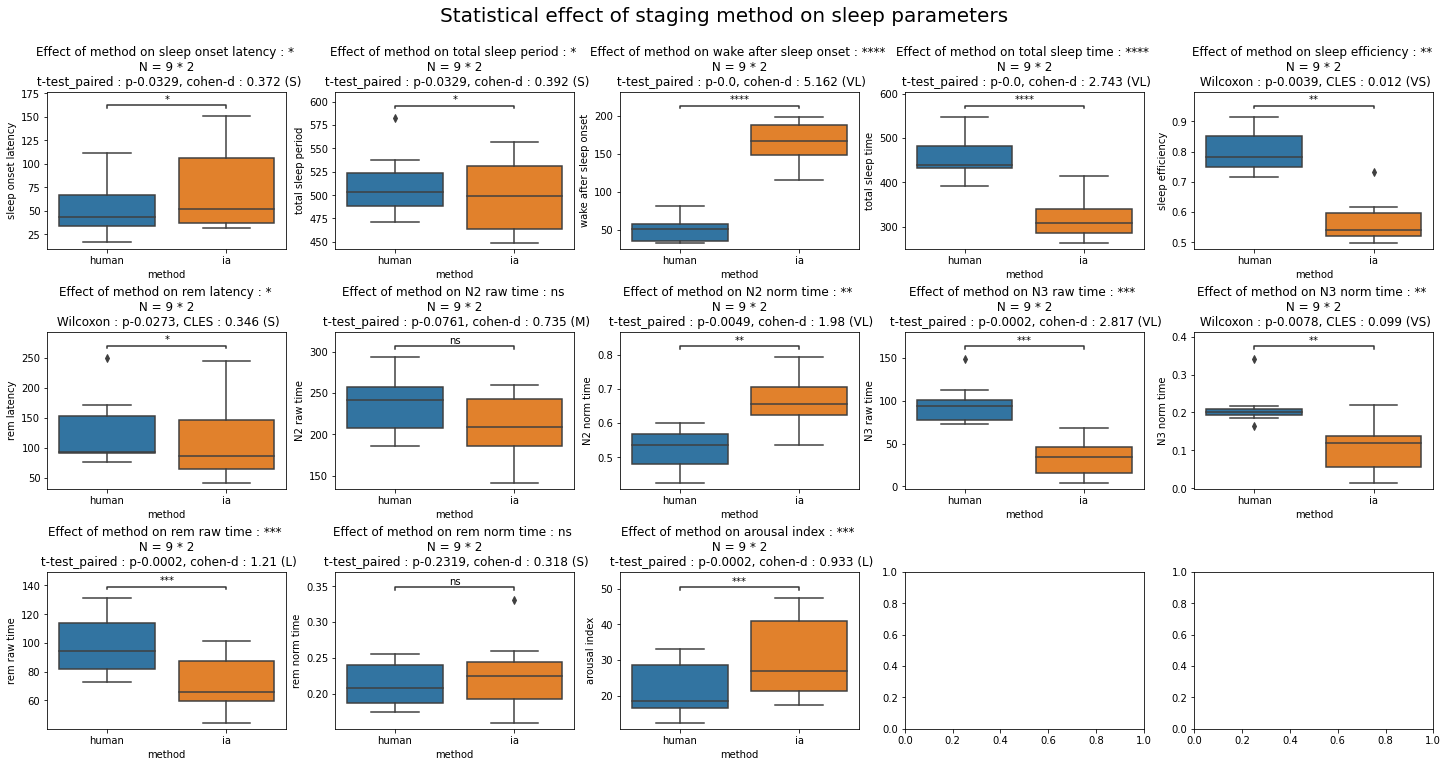

In [7]:
predictor = 'method'
outcomes = sleep_params.set_index(['participant','method','time in bed']).columns
fig, axs = plt.subplots(nrows = 3, ncols = 5, figsize = (20,10), constrained_layout = True)
fig.suptitle('Statistical effect of staging method on sleep parameters', fontsize = 20, y = 1.05)
for row, sublist in enumerate([ outcomes[:5], outcomes[5:10], outcomes[10:] ]):
    for col, outcome in enumerate(sublist):
        ax = axs[row, col]
        gh.auto_stats(df=sleep_params, predictor = predictor, outcome=outcome, design = 'within', transform = False, ax=ax)
# plt.savefig('../presentation_5/staging_method_stats', bbox_inches = 'tight')

In [8]:
sleep_params.groupby('method').mean()

,time in bed,sleep onset latency,total sleep period,wake after sleep onset,total sleep time,sleep efficiency,rem latency,N2 raw time,N2 norm time,N3 raw time,N3 norm time,rem raw time,rem norm time,arousal index
method,,,,,,,,,,,,,,
human,568.062963,55.833333,512.229630,49.944444,454.666667,0.800559,122.944444,238.555556,0.525117,96.166667,0.211809,97.500000,0.213161,21.332212
ia,568.062963,70.166667,497.896296,165.222222,320.777778,0.564842,108.611111,211.500000,0.658814,33.777778,0.106261,72.833333,0.226472,30.560436


In [38]:
sleep_params[sleep_params['method'] == 'ia'][['total sleep time','N2 norm time','N3 norm time','rem norm time']].describe()

,total sleep time,N2 norm time,N3 norm time,rem norm time
count,9.000000,9.000000,9.000000,9.000000
mean,320.777778,0.658814,0.106261,0.226472
std,47.974024,0.077755,0.065899,0.050189
min,264.500000,0.534972,0.014975,0.159213
25%,286.500000,0.624549,0.055846,0.192869
50%,308.500000,0.655405,0.120337,0.225131
75%,341.000000,0.705061,0.138629,0.244284
max,415.500000,0.792013,0.220421,0.330813


In [43]:
sleep_params[sleep_params['method'] == 'ia'][['N2 norm time','N3 norm time']].sum(axis = 1).std()

0.04817453846500862

In [9]:
def get_resp_features():
    concat = []
    for participant in participants:
        df = pd.read_excel(f'../df_analyse/resp_features_{participant}.xlsx', index_col = 0)
        concat.append(df)
    df_all = pd.concat(concat)
    return df_all

In [10]:
df_resp = get_resp_features()

In [11]:
df_resp

,participant,cycle_num,inspi_index,expi_index,inspi_time,expi_time,cycle_duration,insp_duration,exp_duration,cycle_freq,insp_volume,exp_volume,total_amplitude,insp_amplitude,exp_amplitude
0,P1,0,155,434,0.605469,1.695312,2.960938,1.089844,1.871094,0.337731,7.869404,-10.496529,23.952921,11.693759,12.259161
1,P1,1,913,1202,3.566406,4.695312,3.140625,1.128906,2.011719,0.318408,9.648354,-11.921939,30.184469,15.778508,14.405961
2,P1,2,1717,1996,6.707031,7.796875,3.136719,1.089844,2.046875,0.318804,2.488780,-6.864856,11.839557,4.182194,7.657364
3,P1,3,2520,2795,9.843750,10.917969,3.140625,1.074219,2.066406,0.318408,6.723655,-9.924664,22.142028,8.989756,13.152271
4,P1,4,3324,3557,12.984375,13.894531,2.535156,0.910156,1.625000,0.394453,5.216282,-7.543787,20.618182,10.438046,10.180135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,P10,3302,3351173,3351466,13090.519531,13091.664062,3.199219,1.144531,2.054688,0.312576,75.023351,21.572221,119.843260,88.822067,31.021193
3303,P10,3303,3351992,3352298,13093.718750,13094.914062,3.359375,1.195312,2.164062,0.297674,80.619820,24.688152,119.738339,88.812426,30.925913
3304,P10,3304,3352852,3353141,13097.078125,13098.207031,3.226562,1.128906,2.097656,0.309927,80.977879,22.006793,125.001182,93.702418,31.298763
3305,P10,3305,3353678,3353963,13100.304688,13101.417969,3.203125,1.113281,2.089844,0.312195,78.205671,30.865115,125.757858,94.618876,31.138982


In [48]:
df_resp[['participant','cycle_duration', 'ratio','insp_duration','exp_duration','cycle_freq']].groupby('participant').mean().describe()

,cycle_duration,ratio,insp_duration,exp_duration,cycle_freq
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,3.898152,0.364772,1.410066,2.488087,0.265425
std,0.578435,0.022391,0.205782,0.406939,0.041569
min,2.887187,0.334519,1.043286,1.843901,0.205320
25%,3.697740,0.341911,1.321706,2.298946,0.250754
50%,3.982364,0.365110,1.398794,2.467704,0.255337
75%,4.068046,0.383437,1.531377,2.660658,0.272823
max,4.923449,0.390394,1.667966,3.283153,0.349600


Text(0.5, 1.0, 'Summary of Mean Respiration Features')

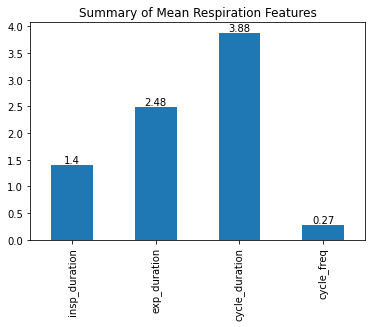

In [12]:
fig, ax = plt.subplots()
df_resp[['insp_duration','exp_duration','cycle_duration','cycle_freq']].mean().round(2).plot.bar(ax=ax)
ax.bar_label(ax.containers[0])
ax.set_title('Summary of Mean Respiration Features')
# plt.savefig('../presentation_4/mean_rsp_features', bbox_inches = 'tight')

Text(0.5, 1.0, 'Number of respiration cycles studied by participant')

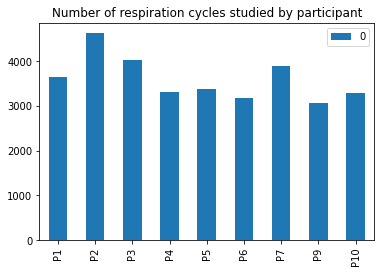

In [13]:
fig, ax = plt.subplots()
pd.DataFrame.from_dict({participant:df_resp[df_resp['participant'] == participant].shape[0] for participant in participants}, orient = 'index').plot.bar(ax=ax)
ax.set_title('Number of respiration cycles studied by participant')
# plt.savefig('../presentation_5/nb_cycles_by_participant', bbox_inches = 'tight')

In [14]:
df_resp.mean()[['insp_duration','exp_duration','cycle_duration','cycle_freq']]

/tmp/ipykernel_2719647/1337650542.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_resp.mean()[['insp_duration','exp_duration','cycle_duration','cycle_freq']]


insp_duration     1.404113
exp_duration      2.478559
cycle_duration    3.882672
cycle_freq        0.266160
dtype: float64

In [15]:
def get_spindles_features():
    df = pd.read_excel(f'../df_analyse/spindles_all_patients.xlsx', index_col = 0)
    return df

In [16]:
df_spindles = get_spindles_features()

In [17]:
df_spindles

,patient,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
0,P1,59.058594,59.421875,59.949219,0.890625,50.531704,9.218439,1.675440,0.273461,13.133481,9,0.406114,Fp2-C4,0
1,P1,61.675781,62.152344,62.367188,0.691406,45.320142,11.024842,2.245295,0.551913,12.831497,9,0.685393,Fp2-C4,0
2,P1,65.429688,65.742188,66.015625,0.585938,44.190640,10.303671,2.206339,0.374822,13.945174,8,0.529801,Fp2-C4,0
3,P1,67.644531,67.765625,68.296875,0.652344,48.667588,11.655442,2.139003,0.361876,14.613991,8,0.184524,Fp2-C4,0
4,P1,87.617188,87.996094,88.328125,0.710938,50.774271,10.271449,1.864013,0.237496,13.915612,7,0.530055,Fp2-C4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,P10,14133.433594,14133.718750,14134.515625,1.082031,27.364759,5.350725,1.300583,0.288894,13.829360,15,0.262590,T3-O1,7
3573,P10,14597.960938,14598.128906,14598.464844,0.503906,26.926206,6.306799,1.473247,0.253790,12.766432,6,0.330769,T3-O1,7
3574,P10,14614.031250,14614.339844,14614.675781,0.644531,34.620598,8.311678,1.893966,0.429763,13.607508,9,0.475904,T3-O1,7
3575,P10,14790.515625,14791.289062,14791.945312,1.429688,37.674629,7.106365,1.654388,0.300484,12.194456,16,0.539510,T3-O1,7


In [70]:
df_spindles['patient'].value_counts().describe()

count       9.000000
mean     3400.222222
std      1528.556163
min      1352.000000
25%      2635.000000
50%      3577.000000
75%      3699.000000
max      6231.000000
Name: patient, dtype: float64

In [69]:
df_spindles['Channel'].value_counts()

C3-T3     5461
Fp1-C3    5181
C4-T4     4929
Fz-Cz     4763
Fp2-C4    4590
Cz-Pz     2060
T3-O1     1943
T4-O2     1675
Name: Channel, dtype: int64

In [60]:
df_spindles[['patient','Duration','Frequency','Oscillations']].groupby('patient').mean().describe()

,Duration,Frequency,Oscillations
count,9.000000,9.000000,9.000000
mean,0.841424,13.463659,10.660401
std,0.068194,0.289775,0.925084
min,0.736725,13.154156,9.194349
25%,0.789929,13.226438,9.961071
50%,0.833423,13.419035,10.582543
75%,0.879300,13.603088,11.170814
max,0.943677,14.012232,11.977050


In [59]:
df_spindles[['patient','Duration','Frequency','Oscillations']].groupby('patient').std().mean()

Duration        0.247705
Frequency       0.555866
Oscillations    3.208000
dtype: float64

In [18]:
df_spindles['Channel'].unique()

array(['Fp2-C4', 'C4-T4', 'T4-O2', 'Fz-Cz', 'Cz-Pz', 'Fp1-C3', 'C3-T3',
       'T3-O1'], dtype=object)

In [19]:
order_chans = ['Fp1-C3','Fp2-C4', 'Fz-Cz', 'C3-T3', 'C4-T4' ,'Cz-Pz' ,'T4-O2'  ,'T3-O1']

In [20]:
rows = []
for participant in participants:
    for chan in order_chans:
        df_participant_spindles = df_spindles[(df_spindles['patient'] == participant) & (df_spindles['Channel'] == chan)]
        nspindles = df_participant_spindles.shape[0] 
        total_duration_in_minutes = df_resp[df_resp['participant'] == participant]['cycle_duration'].sum() / 60
        nspindles_by_minute = nspindles / total_duration_in_minutes
        rows.append([participant, chan, nspindles, total_duration_in_minutes , nspindles_by_minute])
df_spindles_features_number = pd.DataFrame(rows, columns = ['participant','dérivation', 'nspindles','total duration','nspindles_by_minutes'])

In [21]:
df_spindles_features_number

,participant,dérivation,nspindles,total duration,nspindles_by_minutes
0,P1,Fp1-C3,518,175.252279,2.955739
1,P1,Fp2-C4,483,175.252279,2.756027
2,P1,Fz-Cz,500,175.252279,2.853030
3,P1,C3-T3,384,175.252279,2.191127
4,P1,C4-T4,413,175.252279,2.356603
...,...,...,...,...,...
67,P10,C3-T3,840,181.296680,4.633289
68,P10,C4-T4,342,181.296680,1.886411
69,P10,Cz-Pz,202,181.296680,1.114196
70,P10,T4-O2,63,181.296680,0.347497


Text(0.5, 1.0, 'N Spindles detected by minute of NREM')

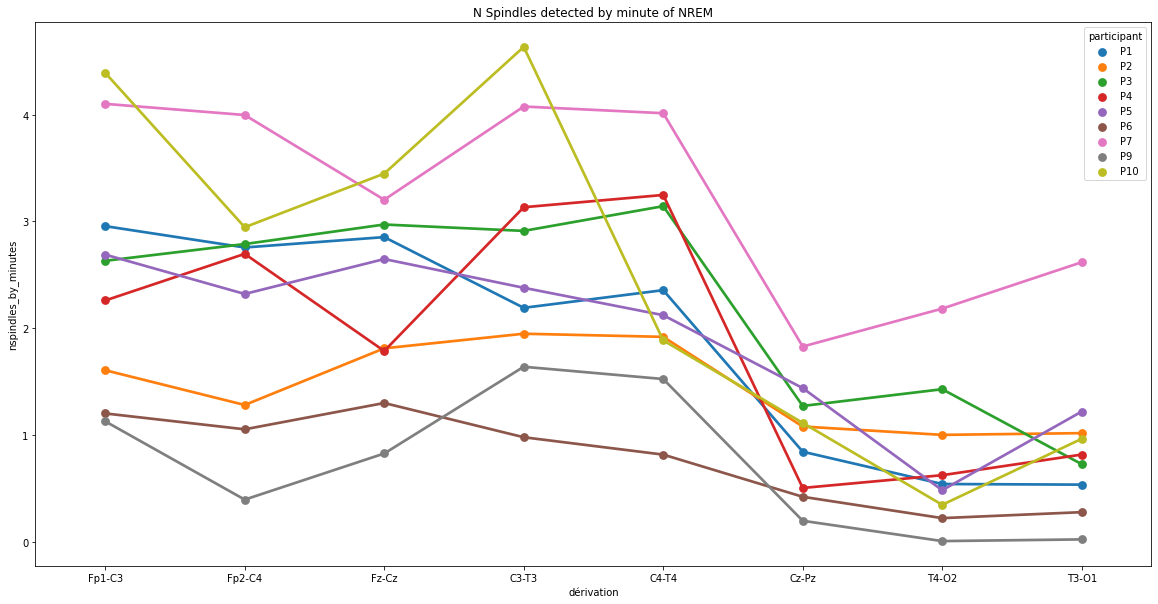

In [49]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=df_spindles_features_number, x='dérivation', y = 'nspindles_by_minutes',hue = 'participant', ax=ax)
ax.set_title('N Spindles detected by minute of NREM')
# plt.savefig('../presentation_4/n_spindles_by_minute')

Text(0.5, 1.0, 'N Spindles detected by minute of NREM')

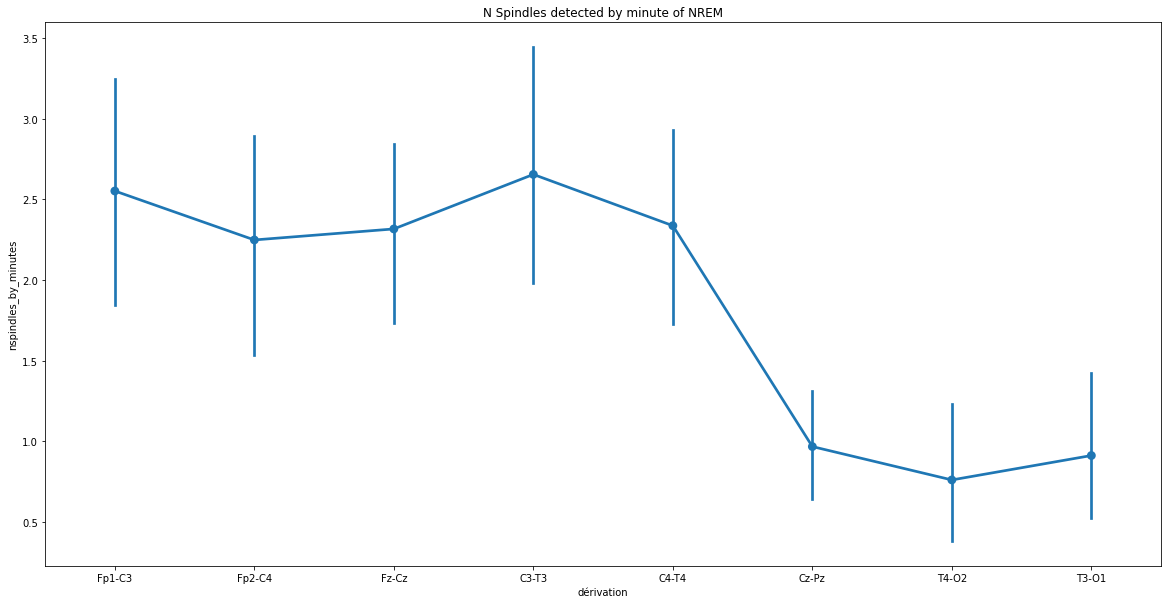

In [50]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=df_spindles_features_number, x='dérivation', y = 'nspindles_by_minutes', ax=ax)
ax.set_title('N Spindles detected by minute of NREM')
# plt.savefig('../presentation_4/n_spindles_by_minute')

[Text(0, 0, '0.86'), Text(0, 0, '13.47'), Text(0, 0, '10.92')]

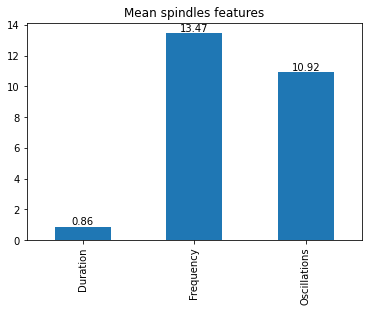

In [23]:
fig, ax = plt.subplots()
df_spindles[['Duration','Frequency','Oscillations']].mean().round(2).plot.bar(ax=ax)
ax.set_title('Mean spindles features')
ax.bar_label(ax.containers[0])
# plt.savefig('../presentation_4/mean_spindles_features', bbox_inches = 'tight')

In [24]:
df_spindles.mean()[['Duration','Frequency']]

/tmp/ipykernel_2719647/3536899752.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_spindles.mean()[['Duration','Frequency']]


Duration      0.861773
Frequency    13.466561
dtype: float64

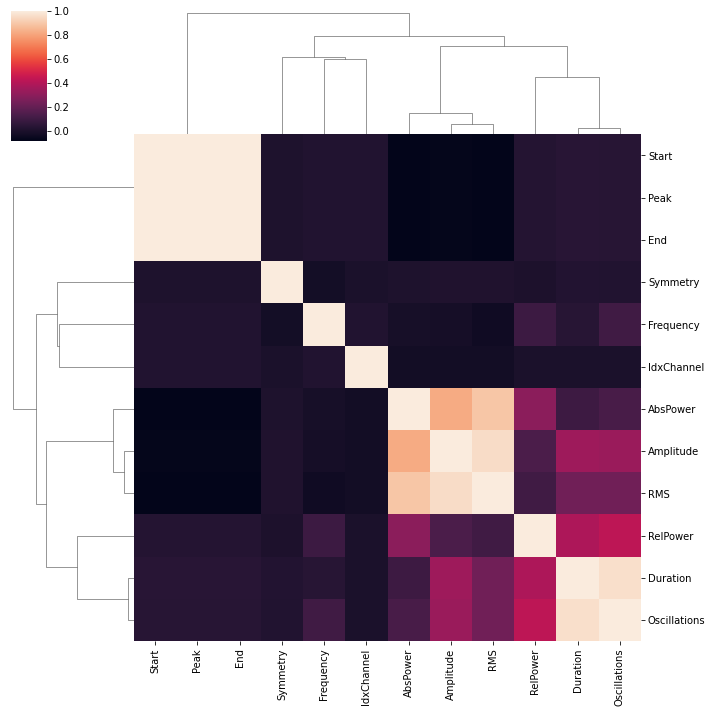

In [25]:
sns.clustermap(df_spindles.corr('spearman'))

In [26]:
def get_staging_comparison_features():
    concat = []
    for participant in participants:
        ser = pd.read_excel(f'../df_analyse/win_staging_{participant}.xlsx').T.loc['win',:].values
        concat.append(ser)
    df_all = pd.DataFrame(concat, columns = [0,1])
    return df_all

In [27]:
get_staging_comparison_features().mean()

0    0.643216
1    0.356784
dtype: float64

In [28]:
def get_spindle_cycle_features():
    concat = []
    for participant in participants:
        ser = pd.read_excel(f'../df_analyse/cycles_numbers_{participant}.xlsx').iloc[:,1].values
        concat.append(ser)
    df_all = pd.DataFrame(concat, columns = ['participant','all','spindled', 'unspindled'])
    return df_all

In [29]:
get_spindle_cycle_features()

,participant,all,spindled,unspindled
0,P1,2348,834,1514
1,P2,2334,851,1483
2,P3,2157,969,1188
3,P4,2053,916,1137
4,P5,1602,706,896
5,P6,1235,380,855
6,P7,2471,1440,1031
7,P9,1451,472,979
8,P10,1689,755,934


In [75]:
def get_sw_features(participants=participants):
    concat = []
    for participant in participants:
        df = pd.read_excel(f'../df_analyse/sw_{participant}.xlsx', index_col = 0)
        df.insert(0, 'participant', participant)
        concat.append(df)
    df_all = pd.concat(concat)
    return df_all


In [76]:
sw = get_sw_features()

In [77]:
sw

,participant,Start,NegPeak,MidCrossing,PosPeak,End,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency,SigmaPeak,PhaseAtSigmaPeak,ndPAC,Channel,IdxChannel
0,P1,217.242188,217.742188,218.039062,218.250000,218.574219,1.3320,-49.212601,26.474553,75.687154,254.946204,0.750751,217.457031,2.100138,0.390700,Fp2-C4,0
1,P1,441.878906,442.425781,442.761719,442.917969,443.093750,1.2148,-70.178987,17.865331,88.044319,262.085414,0.823181,441.914062,1.653936,0.300125,Fp2-C4,0
2,P1,447.082031,447.363281,447.621094,447.804688,447.976562,0.8945,-46.691497,30.282528,76.974025,298.565914,1.117943,447.144531,1.850405,0.304613,Fp2-C4,0
3,P1,447.976562,448.226562,448.460938,448.691406,448.968750,0.9922,-57.412672,48.587253,105.999925,452.266345,1.007861,447.226562,2.234253,0.000000,Fp2-C4,0
4,P1,528.066406,528.316406,528.562500,528.777344,528.988281,0.9219,-47.758588,40.480118,88.238707,358.557284,1.084716,528.046875,1.459173,0.288163,Fp2-C4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,P10,14311.628906,14311.984375,14312.269531,14312.542969,14312.988281,1.3594,-77.188376,61.834063,139.022439,487.530746,0.735619,14311.964844,-3.059574,0.342557,T3-O1,7
5731,P10,14342.925781,14343.218750,14343.468750,14343.722656,14343.984375,1.0586,-43.521799,46.469639,89.991438,359.965751,0.944644,14343.656250,-0.432384,0.216792,T3-O1,7
5732,P10,14481.957031,14482.359375,14482.648438,14482.828125,14483.093750,1.1367,-56.386434,24.403113,80.789547,279.488161,0.879740,14483.046875,-0.262559,0.000000,T3-O1,7
5733,P10,14569.562500,14569.878906,14570.105469,14570.347656,14570.640625,1.0781,-51.707280,57.613689,109.320969,482.520140,0.927558,14569.679688,2.257499,0.097648,T3-O1,7


In [81]:
sw['participant'].value_counts().describe()

count       9.000000
mean     3803.444444
std      2197.009508
min       601.000000
25%      2384.000000
50%      4521.000000
75%      5735.000000
max      6519.000000
Name: participant, dtype: float64

In [82]:
sw[['participant','Duration','Frequency','PTP']].describe()

,Duration,Frequency,PTP
count,34231.000000,34231.000000,34231.000000
mean,1.226692,0.851636,109.789991
std,0.257749,0.177989,26.588950
min,0.691400,0.462086,75.007701
25%,1.015600,0.705219,88.775002
50%,1.199200,0.833889,103.907181
75%,1.418000,0.984640,124.646791
max,2.164100,1.446341,232.443363


In [30]:
mapper_month = {'jan':1,'fev':2,'feb':2,'mar':3,'avr':4,'apr':4,'mai':5,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
rows = []
for participant in patients:
    print(participant)
    input_file = glob.glob(f'../data/{participant}/*.edf')[0]
    signals, signal_headers, header = highlevel.read_edf(input_file)
    gender = header['gender']
    date = header['startdate']
    birth = header['birthdate']
    dbirth = int(birth.split(' ')[0])
    mbirth = mapper_month[birth.split(' ')[1]]
    ybirth = int(birth.split(' ')[2])
    datebirth = datetime.datetime(ybirth, mbirth, dbirth)
    age = (date - datebirth).days // 365
    rows.append([participant, gender , age])
    
df_age = pd.DataFrame(rows, columns = ['participant', 'gender', 'age'])
df_age.to_excel('../participant_characteristics/gender_age.xlsx')
    

P1
P2
P3
P4
P5
P6
P7
P9
P10


In [31]:
df_age.describe()

,age
count,9.000000
mean,26.111111
std,7.236098
min,18.000000
25%,20.000000
50%,24.000000
75%,32.000000
max,38.000000


In [32]:
ratios = []
for i, row in df_resp.iterrows():
    ratio = row['insp_duration'] / row['cycle_duration']
    ratios.append(ratio)
df_resp.insert(7, 'ratio', ratios)

In [33]:
df_mean_rsp_features_all = df_resp.groupby('participant').mean().reset_index()
df_mean_rsp_features_all

,participant,cycle_num,inspi_index,expi_index,inspi_time,expi_time,cycle_duration,ratio,insp_duration,exp_duration,cycle_freq,insp_volume,exp_volume,total_amplitude,insp_amplitude,exp_amplitude
0,P1,1822.505491,1.335588e+06,1.335856e+06,5217.142358,5218.185644,2.887187,0.363089,1.043286,1.843901,0.349600,6.467934,-9.141302,23.259971,9.928025,13.331946
1,P10,1652.722424,1.769532e+06,1.769837e+06,6912.234931,6913.425412,3.296303,0.365110,1.190481,2.105823,0.307212,69.740357,35.657396,104.993869,73.126338,31.867531
2,P2,2332.331462,2.297941e+06,2.298279e+06,8976.331461,8977.653167,3.982364,0.336440,1.321706,2.660658,0.255337,-1.117891,-37.662002,33.586118,10.335571,23.250548
3,P3,2014.403574,1.998935e+06,1.999324e+06,7808.338519,7809.860776,3.989960,0.383437,1.522257,2.467704,0.253386,19.907934,-18.898275,41.246212,20.388551,20.857661
4,P4,1654.302811,1.659028e+06,1.659420e+06,6480.579093,6482.110470,3.947479,0.387272,1.531377,2.416101,0.257164,95.250061,76.171121,116.682830,72.804613,43.878217
5,P5,1694.224556,1.834600e+06,1.835027e+06,7166.406116,7168.074082,4.290843,0.390394,1.667966,2.622877,0.237233,-7.979110,-27.573361,23.148070,8.346326,14.801744
6,P6,1589.345718,1.620383e+06,1.620735e+06,6329.622347,6330.996776,4.068046,0.341911,1.374429,2.693616,0.250754,12.551944,-8.613504,24.042541,13.398017,10.644524
7,P7,1942.868502,1.817979e+06,1.818337e+06,7101.481397,7102.880191,3.697740,0.380777,1.398794,2.298946,0.272823,6.614798,-4.887545,12.370600,7.042895,5.327705
8,P9,1538.037049,1.896551e+06,1.896970e+06,7408.400577,7410.040873,4.923449,0.334519,1.640296,3.283153,0.205320,15.530913,-10.685781,29.591067,14.168692,15.422375


In [34]:
df_mean_rsp_features_all[['cycle_duration','ratio','insp_duration','exp_duration','cycle_freq']].mean().round(2)

cycle_duration    3.90
ratio             0.36
insp_duration     1.41
exp_duration      2.49
cycle_freq        0.27
dtype: float64

In [35]:
# df_mean_rsp_features_all.to_excel('../participant_characteristics/mean_resp_features_by_participant.xlsx')